# Проект Принятие решений в бизнесе

## Информация о проекте 

Мы в качестве аналитика крупного интернет-магазина вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Задачи:**

- приоритизировать гипотезы
- проанализировать результаты A/B-теста
- принять решение по результатам теста 

## Загрузим данные и импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.set_option('max_colwidth',150)

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

## Первая часть. Приоритизация гипотез.

Нам даны  9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**В первой части необходимо сделать:**

1)применить фреймворк ICE для приоритизации гипотез

2)примените фреймворк RICE для приоритизации гипотез

3)указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Описание данных для первой части:**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 
Чем больше значение Efforts, тем дороже проверка гипотезы.


In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


###  применим фреймворк ICE

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis','ICE']].sort_values(by = 'ICE',ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Таким образом, наиболее перспективные гипотезы под номером: 8,0,7

###  применим фреймворк RICE

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis','RICE']].sort_values(by = 'RICE',ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы под номером: 7,2,0,6

### Изменения и причины

- После приоритизации гипотез наиболее перспективными гипотезами в фреймворках ICE и RICE стали: 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' и 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

- Остальные результаты различаются потому, что фреймворк RICE предполагает ещё и оценку охвата. Это очень важная метрика(она дает более точный прогноз).

## Вторая часть. Анализ A/B-теста. 

**Для того чтобы проанализировать A/B-тест необходимо:**

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.
 
**Описание данных:**

**orders**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**visitors**

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Изучим данные

In [6]:
display(orders.head(5))
orders.info()
print(orders.isna().sum())
print('Kоличество дубликатов:',orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Kоличество дубликатов: 0


In [7]:
display(visitors.head(5))
visitors.info()
print(visitors.isna().sum())
print('Kоличество дубликатов:',visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
date        0
group       0
visitors    0
dtype: int64
Kоличество дубликатов: 0


Данные чистые, необходимо поменять тип данных в двух столбцах 

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [9]:
# количетсво в группе А
ordersA = orders.query('group == "A"')
ordersA['visitorId'].count()

557

In [10]:
# количество в группе B
ordersB = orders.query('group == "B"')
ordersB['visitorId'].count()

640

Проверили данные, дубликатов и пропусков  не обнаружали, перевели столбцы с датой в тип datetime.

**Разберемся с количеством участников теста:**

- всего участников теста 1197
- участников группы A - 557
- участников группы B - 640

Можно заметить, что  группы по размеру разные. Это можно объяснить более эффективной работой с пользователями в группе В. Возможно, причина просто в лучшей конверсии. Разница в данном случае не значительна.

**Также необходимо разобраться нет ли пересекающихся пользователей**

In [11]:
cross_vis = len(set(orders.query('group =="A"')['visitorId']) & set(orders.query('group == "B"')['visitorId']))
print('Количество пересекающихся пользователей в двух группах:', cross_vis)
print('Количество уникальных пользователей по группам:',orders['visitorId'].count() - cross_vis)

Количество пересекающихся пользователей в двух группах: 58
Количество уникальных пользователей по группам: 1139


**Вывод:**

У нас в двух группах присутствуют одни и те же пользователи. Это могло произойти из-за того, что пользователи делали несколько заказов, попадая в разные группы. Количество таких пользователей небольшое, поэтому нет необходимости их удалять и можно продолжать исследование.
Мы можем удалить их из датафрейма ordes, но как удалить из visitors? 

### Построим график кумулятивной выручки по группам.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
 
datesGroups = orders[['date','group']].drop_duplicates()
 
# получим строки таблицы orders, 
# Агрегируем значения, найдём число уникальных ID заказов и пользователей и подсчитаем сумму чеков.
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'transactionId' : pd.Series.nunique,
    'visitorId' : pd.Series.nunique,
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
 
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
 
 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
 
 
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']  
 
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


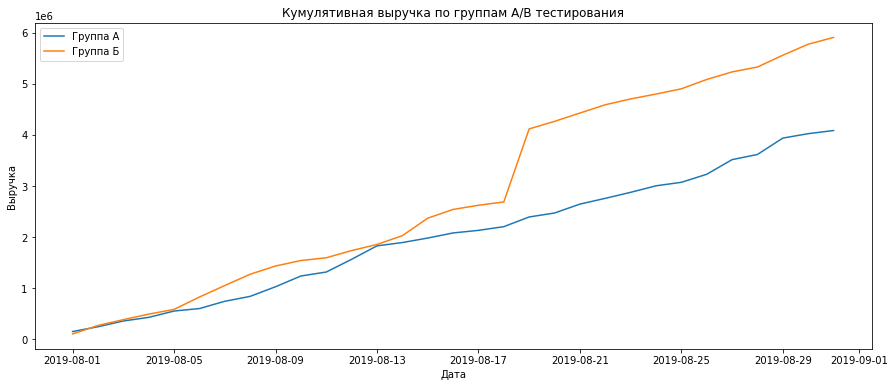

In [13]:
#зададим размер графика 
plt.figure(figsize=(15,6))
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам A/B тестирования')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(['Группа А','Группа Б'])
plt.show()

**Вывод**:

По графику видно, что выручка постепенно растёт, однако в группе "Б" есть скачек. Воможно это связано либо с большим количеством заказов в тот день, либо были офомрлены дорогие заказаы.

### Построим график кумулятивного среднего чека по группам.

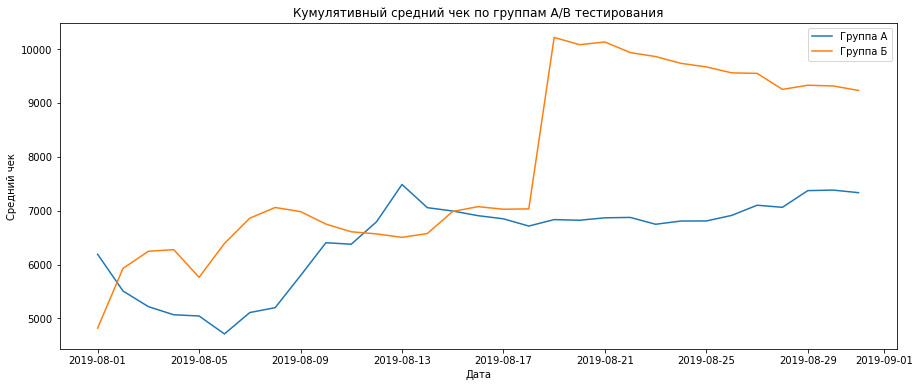

In [14]:
#зададим размер графика 
plt.figure(figsize=(15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам A/B тестирования')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend(['Группа А','Группа Б'])
plt.show()

**Выводы:**

- По графику видно, что средний чек в двух группах постоянно менялся(видны калебания). В группе А он становится стабильным с середины месяца. 
- В группе Б наблюдается увеличение среднего чека, возможно это связано с оформлением дорогих или крупных заказов.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

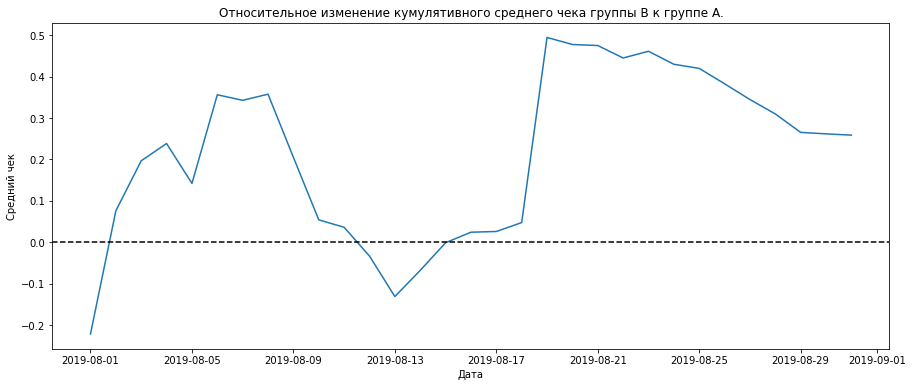

In [15]:
plt.figure(figsize=(15,6))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Средний чек');

**Выводы:**

 Резкий скачек свидетельствует о наличии или крупные заказы илм выбросов, необходимо больше информации чтобы разобраться.



### Построим график кумулятивной конверсии по группам

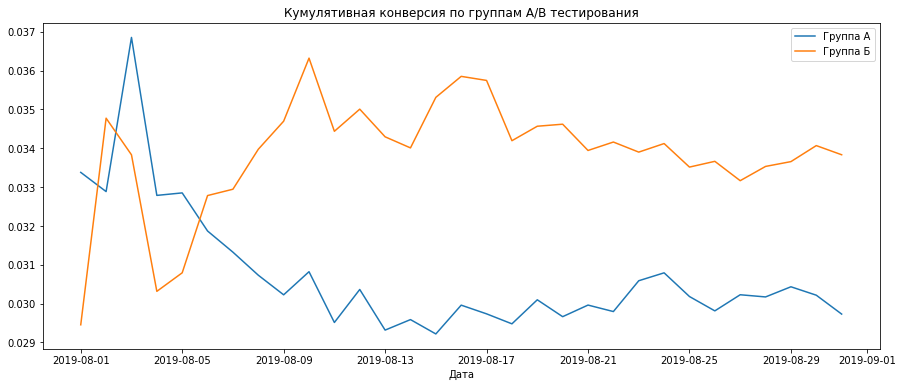

In [16]:
plt.figure(figsize=(15,6))
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам A/B тестирования')
plt.xlabel('Дата')
plt.legend(['Группа А','Группа Б']);

**Вывод:**

По графику видно, что в начале месяца конверсия группы А превышала конверсия другой группы. Затем конверсия группы Б стала превышать конверсию группы А. С 18 числа показатели двух группы понемногу зафиксировались.  


### Построим график относительного изменения кумулятивной конверсии группы B к группе A

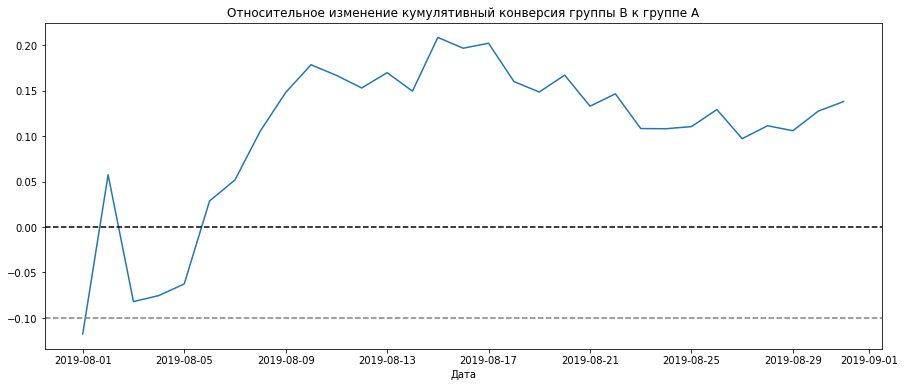

In [17]:
plt.figure(figsize=(15,6))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение кумулятивный конверсия группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= -0.1, color='grey', linestyle='--');


**Вывод:**
Почти с самого начала группа Б лидирует над группой А. Прирост относительно группы А примерно 10-15%

### Построим точечный график количества заказов по пользователям

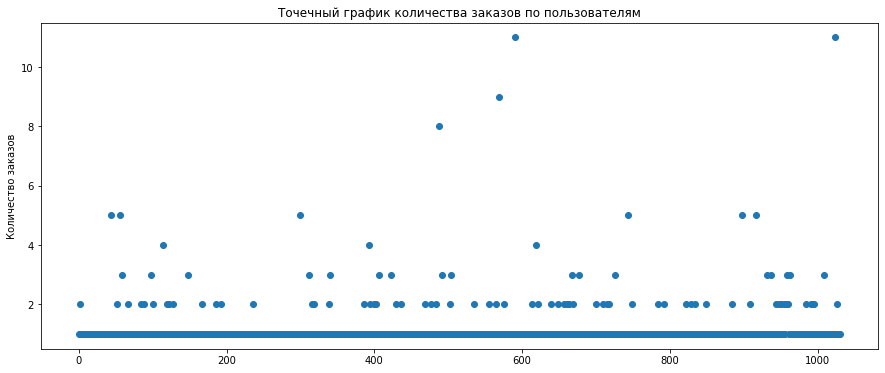

In [18]:
plt.figure(figsize=(15,6))

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)


x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['transactionId']); 

**Вывод:**
По графику видно, что лишь маленькое количество пользователей сделали более 2 заказов. При этом, количество тех, кто сделал 1 заказ и 2 сильно различается.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [19]:
print(np.percentile(ordersByUsers['transactionId'], [95, 99])) 

[2. 4.]


**Выводы:**
- не более 5% пользователей совершили больше 2 заказов
- не более 1% пользователей совершили больше 4 заказов

Границу для определения аномальных пользователей можно выбрать 2 заказа

### Построим точечный график стоимостей заказов.

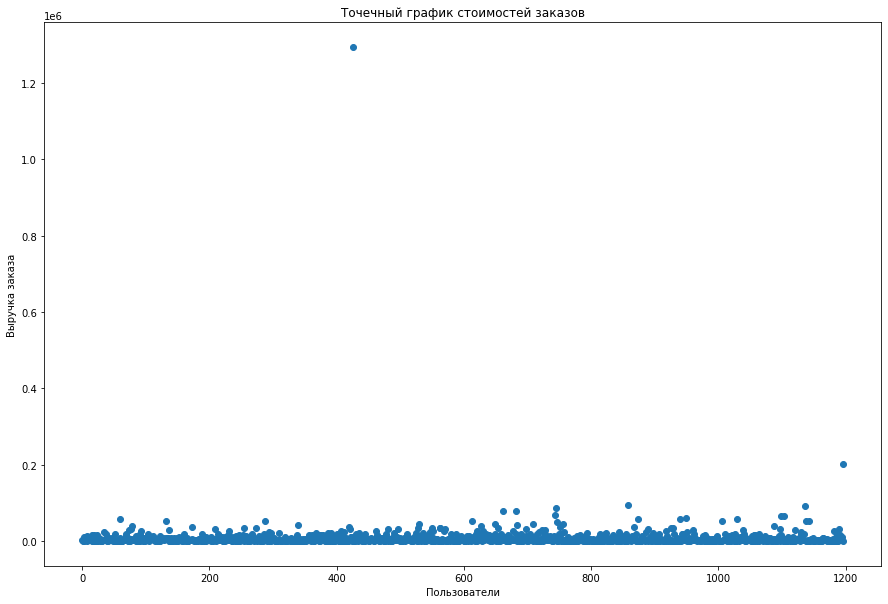

In [20]:
plt.figure(figsize=(15,10))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Выручка заказа');

**Выводы:**
На графике видно, что больше всего заказов, которые не превышают 10 тыс.Видны явные выбросы. Следует рассмотреть график с лимитами чтобы понять в около каких значений распределилось большинство заказов.

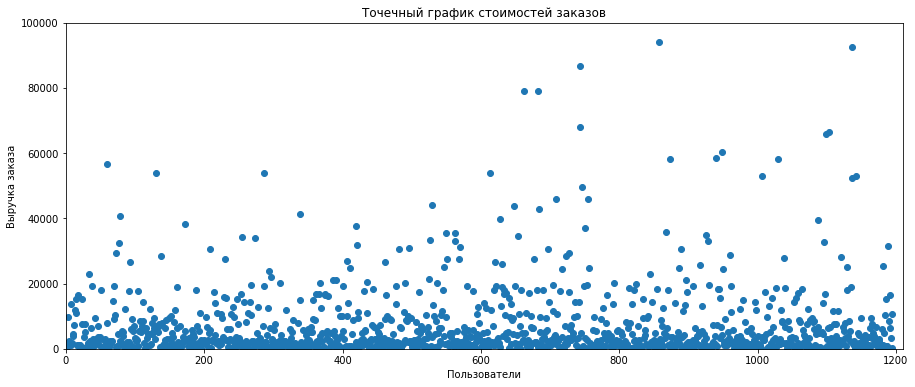

In [21]:
plt.figure(figsize=(15,6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.axis([0, 1210, 0, 100000])
plt.ylabel('Выручка заказа')
plt.xlabel('Пользователи');

**Выводы:**
На графике видно, что больше всего заказов, которые стоят в районе 10к. Заказов на сумму свыше 20к мало.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [22]:
print(np.percentile(orders['revenue'], [ 95, 99]))

[28000.  58233.2]


**Выводы:**

- Не более, чем 5% заказов чек дороже 28000
- Не более, чем 1% заказов чек дороже 58000
- Границу для определения аномальных заказов возьмем 28000

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

**Составим нулевую и альтернативную гипотезы**

**Н0:** Статистически значимых различий в конверсии между группами по сырым данным нет.

**Н1:** Статистически значимые различия в конверсии между группами по сырым данным есть.

    уровень значимости: a = 0.05

In [23]:
# группа А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


In [24]:
# группа  Б
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']



ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [25]:
# объединям данные в общий датасет dats

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [26]:
# Создадим переменные рассчетов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']



sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,
index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,
index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [27]:
alpha = .05
results = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-value:','{0:.5f}'.format(results))
if (results < alpha):
    print('Имеются основания отвергнуть нулевую гипотезу. Статистически значимые различия в конверсии между группами по сырым данным есть.')
else:
    print('Недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу')
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value: 0.01679
Имеются основания отвергнуть нулевую гипотезу. Статистически значимые различия в конверсии между группами по сырым данным есть.
0.138


**Вывод:**

Таким образом, анализ "сырых данных" показывает, что между группами есть статистическая значимость различий в конверсии. Относительный прирост в конверсии 13.8%. 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Составим нулевую и альтернативную гипотезы**

**Н0:** Статистически значимых различий в среднем чеке между группами по сырым данным нет.

**Н1:** Статистически значимые различия в среднем чеке между группами по сырым данным есть.
    
    уровень значимости: a = 0.05

In [28]:
alpha = .05
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value:','{0:.5f}'.format(results))
if (results < alpha):
    print('Имеются основания отвергнуть нулевую гипотезу')
else:
    print('Недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу')
print('{0:.3f}'.format(orders[orders['group']=='B']
['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.72929
Недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу
0.259


**Выводы:**

Так как p-value > 0.05, статистически значимых различий в среднем чеке между группами по сырым данным нет. Однако относительный прирост среднего чека почти 26 процентов. Возможно дело в выбросах, необходимо проверить на чистых данных.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

**Составим нулевую и альтернативную гипотезы**

**Н0:** Статистически значимых различий в конверсии между группами по «очищенным» данным нет.

**Н1:** Статистически значимые различия в конверсии между группами по «очищенным» данным есть.

    уровень значимости: a = 0.05

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [31]:
alpha = .05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-value:','{0:.5f}'.format(results))
if (results < alpha):
    print('Имеются основания отвергнуть нулевую гипотезу')
else:
    print('Недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.01304
Имеются основания отвергнуть нулевую гипотезу
0.173


**Выводы:**

- тест показыает, что статистически значимые различия в конверсии между группами по «очищенным» данным есть

- по «очищенным» данным относительный прирост конверсии группы Б к конверсии группы А равен 17.3%
- значение не сильно отличается от значений сырых данных

Можно сделать вывод, что егруппа Б по показателю конверсия показала себя лучше.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [32]:
alpha = .05
results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
print('p-value:','{0:.5f}'.format(results))
if (results < alpha):
    print('Имеются основания отвергнуть нулевую гипотезу')
else:
    print('Недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу')
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.73848
Недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу
-0.020


**Выводы:**

- не обнаружено различий в среднем чеке заказа между группами
- относительный прирост показателя группы B  показателю группы A меньше 0. Такое различие с сырыми данными по причине наличия выбросов, аномалий

### Принимаем решение по результатам теста

**Варианты решение:**

1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

**Имеющиеся факты:**

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- По сырым данным и по «очищенным» нет статистически значимого различия по среднему чеку между группами.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

Таким образом, следует выбрать первое решение - Остановить тест, зафиксировать победу одной из групп. В группе B показатель конверсии увеличился, следовательно возросло количество клиентов.